# EDA

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import re
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
%matplotlib inline
nltk.download("stopwords")
russian_stopwords = set(stopwords.words("russian"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
df_riv = pd.read_csv('rive_gauche_products.csv')
df_sephora = pd.read_csv('sephora_products_final (1).csv')

In [199]:
df_riv = df_riv.dropna(subset=['price'])
df_sephora = df_sephora.dropna(subset=['price'])

In [200]:
df_riv[df_riv['rating'].notna()]

,brand_name,product_link,product_name,rating,reviews_count,price,is_hit,only_in_stores,description,size,category,production,result
13,ACCA KAPPA,https://rivegauche.ru/product/acca-kappa-lympi...,Acca Kappa Lympio Medium Nylon Toothbrush Turq...,5.0,1,990.0,False,False,Коллекция Lympio вдохновлена стилем 30-ых годо...,40 г,Аксессуары,Италия,NaN
30,ACCA KAPPA,https://rivegauche.ru/product/acca-kappa-1869-...,Acca Kappa 1869 Acqua di Colonia,5.0,1,3990.0,False,False,Одеколон 1869 – это образ элегантной и яркой м...,30 мл,Парфюмерия,Италия,NaN
34,ACCA KAPPA,https://rivegauche.ru/product/acca-kappa-musch...,Acca Kappa Muschio Bianco White Moss Deodorant...,5.0,1,3200.0,False,False,Дезодорант-стик мягко и эффективно воздействуе...,75 мл,Уход за телом,Италия,NaN
36,ACCA KAPPA,https://rivegauche.ru/product/acca-kappa-jasmi...,Acca Kappa Jasmine & Water Lily Eau de Parfum,5.0,1,2990.0,False,False,"С ясного неба падают легкие весенние лепестки,...",15 мл,Парфюмерия,Италия,NaN
53,ACCA KAPPA,https://rivegauche.ru/product/acca-kappa-natur...,Acca Kappa Natural Care Natural Toothpaste,5.0,1,1850.0,False,False,"Зубная паста эффективно и мягко очищает, обесп...",100 мл,Уход за губами,Италия,Универсальный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13216,27 87 Perfumes,https://rivegauche.ru/product/27-87-perfumes-h...,27 87 Perfumes Hamaca Eau De Parfum,5.0,1,9450.0,False,False,Радостный манящий аромат. Мякоть личи раскрыва...,30 мл,Парфюмерия,Франция,NaN
13217,27 87 Perfumes,https://rivegauche.ru/product/27-87-perfumes-s...,27 87 Perfumes Sonar Eau De Parfum,4.9,7,9450.0,False,False,Радостный манящий аромат. Мякоть личи раскрыва...,30 мл,Парфюмерия,Франция,NaN
13218,27 87 Perfumes,https://rivegauche.ru/product/27-87-perfumes-w...,27 87 Perfumes Wandervogel Eau De Parfum,4.9,9,9450.0,False,False,Радостный манящий аромат. Мякоть личи раскрыва...,30 мл,Парфюмерия,Франция,NaN
13219,27 87 Perfumes,https://rivegauche.ru/product/27-87-perfumes-f...,27 87 Perfumes Flaneur Eau de Parfum,5.0,1,9450.0,False,False,Радостный манящий аромат. Мякоть личи раскрыва...,30 мл,Парфюмерия,Франция,NaN


In [201]:
pd.set_option('display.max_columns', None)
df_sephora.head()

,brandName,currentSku,displayName,heroImage,altImage,onSaleData,productId,rating,reviews,targetUrl,price,isLimitedEdition,isLimitedTimeOffer,skuType,isAppExclusive,isBI,isBest,isNatural,isNew,isOnlineOnly,biExclusiveLevel,brand_id,moreColors
0,ABBOTT,"{'biExclusiveLevel': 'none', 'imageAltText': '...",Papaya Isla Eau de Parfum,https://www.sephora.com/productimages/sku/s267...,https://www.sephora.com/productimages/product/...,NONE,P505624,4.5909,22,https://www.sephora.com/product/papaya-isla-ea...,$88.00,False,False,Standard,False,False,False,False,False,False,none,abbott,NaN
1,ABBOTT,"{'biExclusiveLevel': 'none', 'imageAltText': '...",Crescent Beach Eau de Parfum,https://www.sephora.com/productimages/sku/s258...,https://www.sephora.com/productimages/product/...,NONE,P483079,4.5652,23,https://www.sephora.com/product/abbott-crescen...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,False,none,abbott,NaN
2,ABBOTT,"{'biExclusiveLevel': 'none', 'imageAltText': '...",Seqouia Eau de Parfum,https://www.sephora.com/productimages/sku/s258...,https://www.sephora.com/productimages/product/...,NONE,P483130,4.1852,27,https://www.sephora.com/product/abbott-sequoia...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,False,none,abbott,NaN
3,ABBOTT,"{'biExclusiveLevel': 'none', 'imageAltText': '...",Big Sky Eau de Parfum,https://www.sephora.com/productimages/sku/s258...,https://www.sephora.com/productimages/product/...,NONE,P483071,4.7500,12,https://www.sephora.com/product/abbott-big-sky...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,False,none,abbott,NaN
4,ABBOTT,"{'biExclusiveLevel': 'none', 'imageAltText': '...",The Cape Eau de Parfum,https://www.sephora.com/productimages/sku/s258...,https://www.sephora.com/productimages/product/...,NONE,P483139,4.5789,19,https://www.sephora.com/product/abbott-the-cap...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,True,none,abbott,NaN


In [202]:
df_sephora = df_sephora.drop(columns=['currentSku', 'heroImage', 'altImage', 'productId', 'brand_id'])

In [203]:
df_sephora.head()

,brandName,displayName,onSaleData,rating,reviews,targetUrl,price,isLimitedEdition,isLimitedTimeOffer,skuType,isAppExclusive,isBI,isBest,isNatural,isNew,isOnlineOnly,biExclusiveLevel,moreColors
0,ABBOTT,Papaya Isla Eau de Parfum,NONE,4.5909,22,https://www.sephora.com/product/papaya-isla-ea...,$88.00,False,False,Standard,False,False,False,False,False,False,none,NaN
1,ABBOTT,Crescent Beach Eau de Parfum,NONE,4.5652,23,https://www.sephora.com/product/abbott-crescen...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,False,none,NaN
2,ABBOTT,Seqouia Eau de Parfum,NONE,4.1852,27,https://www.sephora.com/product/abbott-sequoia...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,False,none,NaN
3,ABBOTT,Big Sky Eau de Parfum,NONE,4.7500,12,https://www.sephora.com/product/abbott-big-sky...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,False,none,NaN
4,ABBOTT,The Cape Eau de Parfum,NONE,4.5789,19,https://www.sephora.com/product/abbott-the-cap...,$31.00 - $88.00,False,False,Standard,False,False,False,False,False,True,none,NaN


In [204]:
new_rows = []
for idx, row in df_sephora.iterrows():
    price_str = row['price']

    if '-' in price_str:
        prices = re.findall(r'\$(\d+\.\d+)', price_str)

        if len(prices) == 2:
            min_price = float(prices[0])
            max_price = float(prices[1])

            small_row = row.copy()
            small_row['price'] = min_price
            small_row['size'] = 'small'
            new_rows.append(small_row)
        else:
            row['price'] = float(re.sub(r'[^\d.]', '', price_str))
            row['size'] = 'standard'
            new_rows.append(row)

    else:
        row['price'] = float(re.sub(r'[^\d.]', '', price_str))
        row['size'] = 'standard'
        new_rows.append(row)

df_sephora = pd.DataFrame(new_rows)

In [205]:
df_riv = df_riv[df_riv['price'] <= 50000]
df_sephora = df_sephora[df_sephora['price'] <= 500]

In [206]:
df_sephora.head()

,brandName,displayName,onSaleData,rating,reviews,targetUrl,price,isLimitedEdition,isLimitedTimeOffer,skuType,isAppExclusive,isBI,isBest,isNatural,isNew,isOnlineOnly,biExclusiveLevel,moreColors,size
0,ABBOTT,Papaya Isla Eau de Parfum,NONE,4.5909,22,https://www.sephora.com/product/papaya-isla-ea...,88.0,False,False,Standard,False,False,False,False,False,False,none,NaN,standard
1,ABBOTT,Crescent Beach Eau de Parfum,NONE,4.5652,23,https://www.sephora.com/product/abbott-crescen...,31.0,False,False,Standard,False,False,False,False,False,False,none,NaN,small
2,ABBOTT,Seqouia Eau de Parfum,NONE,4.1852,27,https://www.sephora.com/product/abbott-sequoia...,31.0,False,False,Standard,False,False,False,False,False,False,none,NaN,small
3,ABBOTT,Big Sky Eau de Parfum,NONE,4.7500,12,https://www.sephora.com/product/abbott-big-sky...,31.0,False,False,Standard,False,False,False,False,False,False,none,NaN,small
4,ABBOTT,The Cape Eau de Parfum,NONE,4.5789,19,https://www.sephora.com/product/abbott-the-cap...,31.0,False,False,Standard,False,False,False,False,False,True,none,NaN,small


In [207]:
products_count = {
    'Рив Гош': len(df_riv),
    'Sephora': len(df_sephora)
}

brands_count = {
    'Рив Гош': df_riv['brand_name'].nunique(),
    'Sephora': df_sephora['brandName'].nunique()
}

avg_products_per_brand = {
    'Рив Гош': len(df_riv) / df_riv['brand_name'].nunique(),
    'Sephora': len(df_sephora) / df_sephora['brandName'].nunique()
}

fig = make_subplots(rows=1, cols=3,
                   subplot_titles=('Количество товаров', 'Количество брендов', 'Среднее кол-во товаров на 1 бренд'))

fig.add_trace(
    go.Bar(
        x=list(products_count.keys()),
        y=list(products_count.values()),
        marker_color=['salmon', 'orange'],
        text=list(products_count.values()),
        textposition='auto'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=list(brands_count.keys()),
        y=list(brands_count.values()),
        marker_color=['salmon', 'orange'],
        text=list(brands_count.values()),
        textposition='auto'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=list(avg_products_per_brand.keys()),
        y=list(avg_products_per_brand.values()),
        marker_color=['salmon', 'orange'],
        text=[f"{val:.1f}" for val in avg_products_per_brand.values()],
        textposition='auto'
    ),
    row=1, col=3
)

fig.update_layout(
    title_text='Сравнение Рив Гош и Sephora',
    height=500,
    width=1200,
    showlegend=False
)

fig.update_yaxes(range=[0, max(products_count.values()) * 1.1], row=1, col=1)
fig.update_yaxes(range=[0, max(brands_count.values()) * 1.1], row=1, col=2)
fig.update_yaxes(range=[0, max(avg_products_per_brand.values()) * 1.1], row=1, col=3)

fig.show()

У Рив Гош более разнообразный ассортимент как товаров, так и брендов. Также в среднем на один бренд в Рив Гош представлено больше продуктов, чем в Sephora.

In [208]:
top10_brands_sp = df_sephora['brandName'].value_counts().head(10)
top10_brands_rg = df_riv['brand_name'].value_counts().head(10)

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Рив Гош – Топ-10 брендов (по кол-ву товаров)",
                                   "Sephora – Топ-10 брендов (по кол-ву товаров)"),
                    horizontal_spacing=0.2)

fig.add_trace(
    go.Bar(
        x=top10_brands_rg.values,
        y=list(reversed(top10_brands_rg.index)),
        orientation='h',
        marker_color='#6a9955',
        text=top10_brands_rg.values,
        textposition='auto'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=top10_brands_sp.values,
        y=list(reversed(top10_brands_sp.index)),
        orientation='h',
        marker_color='#569cd6',
        text=top10_brands_sp.values,
        textposition='auto'
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1200,
    showlegend=False,
    title_text="Топ-10 брендов по количеству товаров"
)

fig.update_xaxes(title_text="Кол-во товаров", row=1, col=1)
fig.update_xaxes(title_text="Кол-во товаров", row=1, col=2)
fig.update_yaxes(title_text="Бренд", row=1, col=1)
fig.update_yaxes(title_text="Бренд", row=1, col=2, showticklabels=True)

fig.show()

В Рив Гош Топ-10 брендов включают как международные марки (например, URIAGE, CLARINS, PUPA), так и российские бренды (LEVRANA, ARAVIA PROFESSIONAL, BOTAVIKOS, ГУРМАНДИЗ). В Sephora представлены в основном международные премиальные и нишевые бренды (TOM FORD, Charlotte Tilbury, Oribe, Benefit Cosmetics и др.).

В Рив Гош бренды из Топ-10 имеют большее количество товаров (от 162 до 269 позиций). В Sephora ассортимент для Топ-10 брендов значительно меньше (от 75 до 91 позиций).

Можно сделать вывод, что Рив Гош ориентирован на более широкий ассортимент, включая массовые и профессиональные бренды, а также российские марки.
Sephora делает же предоставляет больший ассортимент люксовых брендов.

In [209]:
offline_only_count = df_riv['only_in_stores'].sum()
offline_share = offline_only_count / len(df_riv) * 100
online_only_count = df_sephora['isOnlineOnly'].sum()
online_share = online_only_count / len(df_sephora) * 100

labels = ['Рив Гош', 'Sephora']
values_offline_only = [offline_share, 0]
values_online_only = [0, online_share]
values_mixed = [100-offline_share, 100-online_share]

fig = go.Figure(data=[
    go.Bar(name='Только офлайн', x=labels, y=values_offline_only, marker_color='#6a9955'),
    go.Bar(name='Только онлайн', x=labels, y=values_online_only, marker_color='#569cd6'),
    go.Bar(name='В обоих каналах', x=labels, y=values_mixed, marker_color='#d4d4d4')
])
fig.update_layout(
    title='Распределение товаров по каналам продаж',
    yaxis_title='Процент товаров',
    barmode='stack',
    width=800,
    height=500,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.add_annotation(
    x='Рив Гош', y=offline_share/2,
    text=f"{offline_only_count} шт.<br>({offline_share:.1f}%)",
    showarrow=False,
    font=dict(color="white")
)

fig.add_annotation(
    x='Sephora', y=online_share/2,
    text=f"{online_only_count} шт.<br>({online_share:.1f}%)",
    showarrow=False,
    font=dict(color="white")
)

fig.show()

В обоих сетях подавляющее большинство товаров продается одновременно и в офлайне, и в онлайне. Это говорит о том, что обе компании придерживаются омниканальной стратегии, стараясь сделать ассортимент доступным как в розничных магазинах, так и в интернете.

У Рив Гош заметная доля товаров доступна только в офлайн-магазинах. Возможно, офлайн-магазины Рив Гош играют важную роль в стратегии компании, привлекая покупателей уникальным ассортиментом, который нельзя заказать онлайн. Также у некоторых товаров, например, витаминов и БАДов, могут быть ограничения на доставку.

В Sephora значительная доля товаров продается только онлайн. Это может говорить о развитой цифровой стратегии, когда сеть активно тестирует новые продукты и бренды через e-commerce. Возможно, Sephora сотрудничает с нишевыми брендами, которые пока не представлены в офлайн-магазинах.

Рив Гош ориентирован на офлайн, при этом поддерживая омниканальность.
Sephora делает акцент на уникальность товаров в онлайне, предлагая часть ассортимента исключительно там.

In [210]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Рейтинг товаров Рив Гош", "Рейтинг товаров Sephora"))
fig.add_trace(
    go.Histogram(
        x=df_riv['rating'].dropna(),
        nbinsx=50,
        xbins=dict(start=0, end=5, size=0.05),
        marker_color='salmon',
        marker_line_color='black',
        marker_line_width=1
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df_sephora['rating'].dropna(),
        nbinsx=50,
        xbins=dict(start=0, end=5, size=0.05),
        marker_color='orange',
        marker_line_color='black',
        marker_line_width=1
    ),
    row=1, col=2
)

fig.update_layout(
    height=400,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title_text="Средняя оценка", range=[0, 5], row=1, col=1)
fig.update_xaxes(title_text="Средняя оценка", range=[0, 5], row=1, col=2)
fig.update_yaxes(title_text="Число товаров", row=1, col=1)
fig.update_yaxes(title_text="Число товаров", row=1, col=2)

fig.show()

Оба графика смещены вправо – это значит, что большинство товаров если и имеют оценки, то они высокие. Для Sephora пик около 4.5, для Рив Гош больше всего товаров с рейтингом 5. Однако необходимо отметить, что у Рив Гош очень много товаров вовсе без рейтинга.

Таким образом, можно сделать вывод, что вовлеченность покупателей Sephora выше, чем вовлеченность покупателей Рив Гош.



In [211]:
fig = make_subplots(rows=1, cols=1,
                   subplot_titles=["Распределение рейтингов товаров"],
                   horizontal_spacing=0.1)

fig.add_trace(
    go.Box(
        y=df_riv['rating'].dropna(),
        name="Рив Гош",
        boxmean=True,
        marker_color='salmon',
        boxpoints='outliers',
        line=dict(width=2)
    )
)

fig.add_trace(
    go.Box(
        y=df_sephora['rating'].dropna(),
        name="Sephora",
        boxmean=True,
        marker_color='orange',
        boxpoints='outliers',
        line=dict(width=2)
    )
)

fig.update_layout(
    title_text="Сравнение распределения рейтингов в Рив Гош и Sephora",
    height=500,
    width=800,
    yaxis=dict(
        title="Рейтинг товаров",
        range=[0, 5.2],
        zeroline=True
    ),
    showlegend=True,
    boxmode='group'
)

fig.show()

Можем заметить, что товары Рив Гош имеют более высокие оценки, чем у Sephora. Это подтверждается высокой медианой и средним у Рив Гоша - 5 и 4.9 соответственно, а у Sephora данные показатели на уровне 4.4 по медиане и 4.3 по среднему. Также усы у Sephora длиннее, что говорит о более широком диапазоне значений между q1=3,36 и q3=4,6. В общем, можно отметить, что оценки товаров находятся на высоком уровне, что говорит об удовлетворенности клиентов и высоком качестве продукции. Однако, редкие случаи низких рейтингов (выбросы) требуют внимания и анализа для дальнейшего улучшения качества и минимизации негативного влияния на бизнес.

In [212]:
# рассчитываем средний рейтинг и средний отнормированный рейтинг, цену
sephora_mean = df_sephora['rating'].mean()
sephora_std = df_sephora['rating'].std()
riv_mean = df_riv['rating'].mean()
riv_std = df_riv['rating'].std()

sephora_price_mean = df_sephora['price'].mean()
sephora_price_std = df_sephora['price'].std()
riv_price_mean = df_riv['price'].mean()
riv_price_std = df_riv['price'].std()

df_sephora_brands = df_sephora.groupby('brandName').agg({
    'rating': 'mean',
    'price': 'mean'
}).reset_index()
df_sephora_brands.columns = ['brand', 'avg_rating', 'avg_price']
df_sephora_brands['avg_rating_norm'] = (df_sephora_brands['avg_rating'] - sephora_mean) / sephora_std
df_sephora_brands['avg_price_norm'] = (df_sephora_brands['avg_price'] - sephora_price_mean) / sephora_price_std

df_riv_brands = df_riv.groupby('brand_name').agg({
    'rating': 'mean',
    'price': 'mean'
}).reset_index()
df_riv_brands.columns = ['brand', 'avg_rating', 'avg_price']
df_riv_brands['avg_rating_norm'] = (df_riv_brands['avg_rating'] - riv_mean) / riv_std
df_riv_brands['avg_price_norm'] = (df_riv_brands['avg_price'] - riv_price_mean) / riv_price_std

In [213]:
df_sephora_brands.head()

,brand,avg_rating,avg_price,avg_rating_norm,avg_price_norm
0,ABBOTT,4.381457,39.142857,0.220262,-0.165651
1,AERIN,4.062617,105.000000,-0.475910,1.153904
2,ALPYN,4.536454,47.076923,0.558690,-0.006679
3,ALTERNA Haircare,4.373800,42.500000,0.203543,-0.098385
4,Act+Acre,4.653252,49.222222,0.813712,0.036306


In [214]:
df_riv_brands.head()

,brand,avg_rating,avg_price,avg_rating_norm,avg_price_norm
0,100BON,4.763636,6019.545455,-0.659899,0.287291
1,27 87 Perfumes,4.970000,10259.090909,0.315992,0.906700
2,3LAB,NaN,37238.333333,NaN,4.848441
3,A-DERMA,NaN,1726.875000,NaN,-0.339880
4,ACCA KAPPA,5.000000,2434.333333,0.457862,-0.236518


In [215]:
def normalize_brand_name(name):
    if pd.isna(name):
        return name
    name = str(name).lower()
    name = re.sub(r'[^\w\s]', '', name)
    name = re.sub(r'\s+', ' ', name)
    name = name.strip()
    if name.endswith(' ru'):
        name = name[:-3]
    return name

In [216]:
df_sephora_brands = df_sephora_brands[df_sephora_brands['avg_rating'].notnull()]
df_riv_brands = df_riv_brands[df_riv_brands['avg_rating'].notnull()]

df_sephora_brands['brand_normalized'] = df_sephora_brands['brand'].apply(normalize_brand_name)
df_riv_brands['brand_normalized'] = df_riv_brands['brand'].apply(normalize_brand_name)

df_sephora_agg = df_sephora_brands.groupby('brand_normalized').agg({
    'avg_rating': 'mean',
    'avg_rating_norm': 'mean',
    'avg_price': 'mean',
    'avg_price_norm': 'mean'
}).reset_index()

df_riv_agg = df_riv_brands.groupby('brand_normalized').agg({
    'avg_rating': 'mean',
    'avg_rating_norm': 'mean',
    'avg_price': 'mean',
    'avg_price_norm': 'mean'
}).reset_index()
common_brands = pd.merge(df_sephora_agg, df_riv_agg, on='brand_normalized', how='inner',
                         suffixes=('_sephora', '_riv'))

In [217]:
common_brands.columns = [
    'brand',
    'sephora_rating',
    'sephora_rating_norm',
    'sephora_price',
    'sephora_price_norm',
    'riv_rating',
    'riv_rating_norm',
    'riv_price',
    'riv_price_norm'
]

In [218]:
common_brands

,brand,sephora_rating,sephora_rating_norm,sephora_price,sephora_price_norm,riv_rating,riv_rating_norm,riv_price,riv_price_norm
0,beautyblender,4.415238,0.294022,23.076923,-0.487558,4.700000,-0.960834,2360.000000,-0.247378
1,bobbi brown,4.418361,0.300839,42.263158,-0.103131,4.967857,0.305859,5071.250000,0.148743
2,carolina herrera,4.354925,0.162331,52.875000,0.109495,4.933333,0.142596,17661.630435,1.988231
3,caudalie,4.359002,0.171233,44.600000,-0.056308,4.856364,-0.221393,4283.370787,0.033631
4,clarins,4.379256,0.215457,71.031250,0.473285,4.914516,0.053610,4886.142322,0.121698
5,clinique,4.097330,-0.400115,34.541667,-0.257843,4.768571,-0.636561,4739.715909,0.100305
6,dr barbara sturm,4.151418,-0.282016,173.522727,2.526868,5.000000,0.457862,20701.282051,2.432333
7,gucci,4.244756,-0.078219,61.870370,0.289732,5.000000,0.457862,13476.500000,1.376772
8,juliette has a gun,4.022050,-0.564485,41.529412,-0.117832,4.911111,0.037507,12682.352941,1.260745
9,korres,4.376575,0.209602,43.000000,-0.088367,4.918868,0.074189,4283.693694,0.033679


In [219]:
common_brands['brand'] = common_brands['brand'].str.title()

sephora_avg = common_brands['sephora_rating'].mean()
riv_avg = common_brands['riv_rating'].mean()

sephora_norm_avg = common_brands['sephora_rating_norm'].mean()
riv_norm_avg = common_brands['riv_rating_norm'].mean()

fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['sephora_rating'],
    name='Sephora',
    marker_color='orange',
    text=common_brands['sephora_rating'].round(2),
    textposition='auto'
))
fig1.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['riv_rating'],
    name='Рив Гош',
    marker_color='salmon',
    text=common_brands['riv_rating'].round(2),
    textposition='auto'
))

fig1.add_shape(
    type="line",
    x0=-0.5,
    y0=sephora_avg,
    x1=len(common_brands['brand']),
    y1=sephora_avg,
    line=dict(
        color="orange",
        width=2,
        dash="dash",
    )
)
fig1.add_shape(
    type="line",
    x0=-0.5,
    y0=riv_avg,
    x1=len(common_brands['brand']),
    y1=riv_avg,
    line=dict(
        color="salmon",
        width=2,
        dash="dash",
    )
)

fig1.update_layout(
    title='Сравнение средних рейтингов брендов в Sephora и Рив Гош',
    xaxis_title='Бренд',
    yaxis_title='Средний рейтинг',
    yaxis=dict(range=[0, 5]),
    barmode='group',
    height=600,
    width=1000,
    bargap=0.15,
    bargroupgap=0.1,
    legend=dict(
        x=0.01,
        y=0.01,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)
fig1.update_xaxes(tickangle=45)
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['sephora_rating_norm'],
    name='Sephora',
    marker_color='orange',
    text=common_brands['sephora_rating_norm'].round(2),
    textposition='auto'
))
fig2.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['riv_rating_norm'],
    name='Рив Гош',
    marker_color='salmon',
    text=common_brands['riv_rating_norm'].round(2),
    textposition='auto'
))

y_min = min(common_brands['sephora_rating_norm'].min(), common_brands['riv_rating_norm'].min())
y_max = max(common_brands['sephora_rating_norm'].max(), common_brands['riv_rating_norm'].max())
y_range = [y_min - 0.3, y_max + 0.3]

fig2.add_shape(
    type="line",
    x0=-0.5,
    y0=0,
    x1=len(common_brands['brand']),
    y1=0,
    line=dict(
        color="gray",
        width=1,
        dash="dash",
    )
)
fig2.add_shape(
    type="line",
    x0=-0.5,
    y0=sephora_norm_avg,
    x1=len(common_brands['brand']),
    y1=sephora_norm_avg,
    line=dict(
        color="orange",
        width=2,
        dash="dash",
    )
)
fig2.add_shape(
    type="line",
    x0=-0.5,
    y0=riv_norm_avg,
    x1=len(common_brands['brand']),
    y1=riv_norm_avg,
    line=dict(
        color="salmon",
        width=2,
        dash="dash",
    )
)

fig2.update_layout(
    title='Сравнение нормализованных рейтингов брендов в Sephora и Рив Гош',
    xaxis_title='Бренд',
    yaxis_title='Нормализованный рейтинг',
    yaxis=dict(range=y_range, zeroline=False),
    barmode='group',
    height=600,
    width=1000,
    bargap=0.15,
    bargroupgap=0.1,
    legend=dict(
        x=0.01,
        y=0.01,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)
fig2.update_xaxes(tickangle=45)
fig2.show()

Гипотеза о том, что в Рив Гош бренды лучше, провалилась, т.к. даже на совпадающих брендах у Рив Гош рейтинг выше, чем у Sephora.

При этом рейтинг совпадающих брендов в Рив Гош выше, чем в Sephora, относительно других брендов магазина.

In [220]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Распределение цен в Sephora', 'Распределение цен в Рив Гош'))
sephora_filtered = df_sephora[df_sephora['price'] <= 500]
riv_filtered = df_riv[df_riv['price'] <= 50000]

fig.add_trace(
    go.Box(
        y=sephora_filtered['price'],
        name='Sephora',
        marker_color='orange',
        boxmean=True
    ),
    row=1, col=1
)

fig.add_trace(
    go.Box(
        y=riv_filtered['price'],
        name='Рив Гош',
        marker_color='salmon',
        boxmean=True
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Ящики с усами для распределения цен Sephora и Рив Гош',
    height=600,
    width=1000,
    showlegend=False
)

fig.update_yaxes(title_text='Цена, $', row=1, col=1)
fig.update_yaxes(title_text='Цена, ₽', row=1, col=2)

fig.show()

На данном графике можно рассмотреть ящики с усами для стоимости товаров у двух компаний. Можно заметить, что цены на косметику в сефоре на порядок выше чем в Рив Гош: по среднему 55 дол и 4000 руб., по медиане 36 дол. и 1500 руб.. Также это наглядно отображено на графике по расположению самого ящика, тк q1 у графиков компаний составляет 26 дол. и 620 руб. соответственно, а q3 на уровне 62 дол. и 4150 руб.. Также присутствуют выбросы вплоть до 500 дол. (50 000 руб.). Верхний ус имеет не такую большую разницу 116$ и 9400 руб.. Если считать, что 1 дол. = 100 руб. то можно наглядно заметить, что в сефоре более широкий диапазон цен, что говорит о большем наборе товаров разных ценовых категорий. А смещенная сниз медиана говорит о том, что во второй половине значенйи более широкий разброс цен.

In [221]:
bins = [-0.1, 0.9, 10, 50, 200, np.inf]
labels = ["0", "1", "2-10", "11-50", "51-200+"]

df_riv['reviews_bin'] = pd.cut(df_riv['reviews_count'], bins=bins, labels=labels)
df_sephora['reviews_bin'] = pd.cut(df_sephora['reviews'], bins=bins, labels=labels)

rg_counts = df_riv['reviews_bin'].value_counts().reindex(labels)
sp_counts = df_sephora['reviews_bin'].value_counts().reindex(labels)

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Рив Гош: распределение по кол-ву отзывов",
                                    "Sephora: распределение по кол-ву отзывов"))
fig.add_trace(
    go.Bar(
        x=rg_counts.index,
        y=rg_counts.values,
        marker_color='lightblue',
        marker_line_color='black',
        marker_line_width=1,
        text=rg_counts.values,
        textposition='auto'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=sp_counts.index,
        y=sp_counts.values,
        marker_color='plum',
        marker_line_color='black',
        marker_line_width=1,
        text=sp_counts.values,
        textposition='auto'
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1000,
    showlegend=False,
    title_text="Распределение товаров по количеству отзывов"
)
fig.update_xaxes(title_text="Число отзывов на товар", row=1, col=1)
fig.update_xaxes(title_text="Число отзывов на товар", row=1, col=2)
fig.update_yaxes(title_text="Количество товаров", row=1, col=1)
fig.update_yaxes(title_text="Количество товаров", row=1, col=2)

fig.show()

Пользователи Sephora явно гораздо более вовлечены, чем пользователи Рив Гош. Возможно, Sephora каким-либо образом поощряет пользователей за публикацию отзывов на товары (бонусные баллы и др.).

С точки зрения бизнеса, обратная связь о продукции весьма важный аспект, так как ориентируясь на него компании могут оценить удовлетворенность аудитории товарами и его качеством, чтобы впоследствии грамотно корректировать ассортимент и повышать лояльность клиентов.

In [222]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Распределение цен в Sephora (до $500)', 'Распределение цен в Рив Гош (до ₽50,000)'))

sephora_filtered = df_sephora[df_sephora['price'] <= 500]
riv_filtered = df_riv[df_riv['price'] <= 50000]

sephora_mean = sephora_filtered['price'].mean()
sephora_median = sephora_filtered['price'].median()

riv_mean = riv_filtered['price'].mean()
riv_median = riv_filtered['price'].median()

fig.add_trace(
    go.Histogram(
        x=sephora_filtered['price'],
        nbinsx=100,
        marker_color='orange',
        opacity=0.7,
        name='Sephora'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=riv_filtered['price'],
        nbinsx=100,
        marker_color='salmon',
        opacity=0.7,
        name='Рив Гош'
    ),
    row=1, col=2
)

fig.add_shape(
    type="line",
    x0=sephora_mean, y0=0,
    x1=sephora_mean, y1=sephora_filtered['price'].value_counts().max() * 1.2,
    line=dict(color="red", width=2, dash="solid"),
    row=1, col=1
)

fig.add_shape(
    type="line",
    x0=sephora_median, y0=0,
    x1=sephora_median, y1=sephora_filtered['price'].value_counts().max() * 1.2,
    line=dict(color="blue", width=2, dash="dash"),
    row=1, col=1
)

fig.add_shape(
    type="line",
    x0=riv_mean, y0=0,
    x1=riv_mean, y1=riv_filtered['price'].value_counts().max() * 1.2,
    line=dict(color="red", width=2, dash="solid"),
    row=1, col=2
)

fig.add_shape(
    type="line",
    x0=riv_median, y0=0,
    x1=riv_median, y1=riv_filtered['price'].value_counts().max() * 1.2,
    line=dict(color="blue", width=2, dash="dash"),
    row=1, col=2
)

fig.add_annotation(
    x=sephora_mean, y=sephora_filtered['price'].value_counts().max() * 1.1,
    text=f"Mean: ${sephora_mean:.2f}",
    showarrow=True,
    arrowhead=1,
    row=1, col=1
)

fig.add_annotation(
    x=sephora_median, y=sephora_filtered['price'].value_counts().max() * 0.9,
    text=f"Median: ${sephora_median:.2f}",
    showarrow=True,
    arrowhead=1,
    row=1, col=1
)

fig.add_annotation(
    x=riv_mean, y=riv_filtered['price'].value_counts().max() * 3,
    text=f"Mean: ₽{riv_mean:.2f}",
    showarrow=True,
    arrowhead=1,
    row=1, col=2
)

fig.add_annotation(
    x=riv_median, y=riv_filtered['price'].value_counts().max() * 0.9,
    text=f"Median: ₽{riv_median:.2f}",
    showarrow=True,
    arrowhead=1,
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='red', width=2),
        name='Среднее значение',
        showlegend=True
    )
)

fig.add_trace(
    go.Scatter(
        x=[None], y=[None],
        mode='lines',
        line=dict(color='blue', width=2, dash='dash'),
        name='Медиана',
        showlegend=True
    )
)

fig.update_layout(
    title_text='Сравнение распределения цен между Sephora и Рив Гош',
    height=500,
    width=1000,
    bargap=0.05,
    showlegend=True,
    legend=dict(
        orientation='h',
        yanchor='top',
        y=-0.15,
        xanchor='center',
        x=0.5
    )
)

fig.update_xaxes(title_text='Цена, $', range=[0, 500], row=1, col=1)
fig.update_xaxes(title_text='Цена, ₽', range=[0, 50000], row=1, col=2)
fig.update_yaxes(title_text='Количество товаров', row=1, col=1)
fig.update_yaxes(title_text='Количество товаров', row=1, col=2)

fig.show()

Оба графика распределения смещены влево - в основном цены не очень высокие. Позднее приведено сравнение цен уже в одной валюте.

In [223]:
common_brands = common_brands.dropna(subset=['sephora_price'])
common_brands = common_brands.dropna(subset=['riv_price'])

In [224]:
common_brands['brand'] = common_brands['brand'].str.title()
common_brands = common_brands.dropna(subset=['riv_price'])
conversion_rate = 90
common_brands['sephora_price_rub'] = common_brands['sephora_price'] * conversion_rate

sephora_price_rub_avg = common_brands['sephora_price_rub'].mean()
riv_price_avg = common_brands['riv_price'].mean()
sephora_price_norm_avg = common_brands['sephora_price_norm'].mean()
riv_price_norm_avg = common_brands['riv_price_norm'].mean()

fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['sephora_price_rub'],
    name='Sephora (₽)',
    marker_color='orange',
    text=common_brands['sephora_price_rub'].round(0),
    textposition='auto'
))
fig1.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['riv_price'],
    name='Рив Гош (₽)',
    marker_color='salmon',
    text=common_brands['riv_price'].round(0),
    textposition='auto'
))

fig1.add_shape(
    type="line",
    x0=-0.5,
    y0=sephora_price_rub_avg,
    x1=len(common_brands['brand']),
    y1=sephora_price_rub_avg,
    line=dict(
        color="orange",
        width=2,
        dash="dash",
    )
)
fig1.add_shape(
    type="line",
    x0=-0.5,
    y0=riv_price_avg,
    x1=len(common_brands['brand']),
    y1=riv_price_avg,
    line=dict(
        color="salmon",
        width=2,
        dash="dash",
    )
)

fig1.update_layout(
    title='Сравнение средних цен брендов в Sephora и Рив Гош (₽)',
    xaxis_title='Бренд',
    yaxis_title='Средняя цена (₽)',
    barmode='group',
    height=600,
    width=1000,
    bargap=0.15,
    bargroupgap=0.1,
    legend=dict(
        x=0.01,
        y=0.01,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)
fig1.update_xaxes(tickangle=45)
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['sephora_price_norm'],
    name='Sephora',
    marker_color='orange',
    text=common_brands['sephora_price_norm'].round(2),
    textposition='auto'
))
fig2.add_trace(go.Bar(
    x=common_brands['brand'],
    y=common_brands['riv_price_norm'],
    name='Рив Гош',
    marker_color='salmon',
    text=common_brands['riv_price_norm'].round(2),
    textposition='auto'
))

y_min = min(common_brands['sephora_price_norm'].min(), common_brands['riv_price_norm'].min())
y_max = max(common_brands['sephora_price_norm'].max(), common_brands['riv_price_norm'].max())
y_range = [y_min - 0.3, y_max + 0.3]

fig2.add_shape(
    type="line",
    x0=-0.5,
    y0=0,
    x1=len(common_brands['brand']),
    y1=0,
    line=dict(
        color="gray",
        width=1,
        dash="dash",
    )
)
fig2.add_shape(
    type="line",
    x0=-0.5,
    y0=sephora_price_norm_avg,
    x1=len(common_brands['brand']),
    y1=sephora_price_norm_avg,
    line=dict(
        color="orange",
        width=2,
        dash="dash",
    )
)
fig2.add_shape(
    type="line",
    x0=-0.5,
    y0=riv_price_norm_avg,
    x1=len(common_brands['brand']),
    y1=riv_price_norm_avg,
    line=dict(
        color="salmon",
        width=2,
        dash="dash",
    )
)

fig2.update_layout(
    title='Сравнение нормализованных цен брендов в Sephora и Рив Гош',
    xaxis_title='Бренд',
    yaxis_title='Нормализованная цена',
    yaxis=dict(range=y_range, zeroline=False),
    barmode='group',
    height=600,
    width=1000,
    bargap=0.15,
    bargroupgap=0.1,
    legend=dict(
        x=0.01,
        y=0.01,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)
fig2.update_xaxes(tickangle=45)
fig2.show()

Сравнение средних цен продукции брендов, которые представлены в обеих сетях, показывает, что практически для всех брендов в Рив Гош цена выше, чем в Sephora (цены в рублях, курс = 90). Различия в цепочке поставок, включая импортные пошлины, логистические расходы и валютные курсы, могут влиять на конечную цену товара в разных сетях. Также не исключаются различия в ценообразовании.

In [225]:
cat_counts = df_riv['category'].value_counts().head(10)

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Распределение товаров Рив Гош по категориям (топ-10)",
                                  "Средняя цена товаров по категориям"),
                   vertical_spacing=0.3,
                   row_heights=[0.5, 0.5])

fig.add_trace(go.Bar(
    x=cat_counts.index,
    y=cat_counts.values,
    marker_color='pink',
    text=cat_counts.values,
    textposition='auto',
    name='Количество товаров'
), row=1, col=1)

avg_prices = []
for category in cat_counts.index:
    avg_price = df_riv[df_riv['category'] == category]['price'].mean()
    avg_prices.append(avg_price)

fig.add_trace(go.Bar(
    x=cat_counts.index,
    y=avg_prices,
    marker_color='salmon',
    text=[f"{price:.0f} ₽" for price in avg_prices],
    textposition='auto',
    name='Средняя цена'
), row=2, col=1)

fig.update_layout(
    height=800,
    width=800,
    showlegend=False
)

fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_yaxes(title_text="Количество товаров", row=1, col=1)
fig.update_yaxes(title_text="Средняя цена (₽)", row=2, col=1)

fig.show()

Распределению товаров по категориям в Рив Гош показывает, что наибольшее количество позиций присутствует в категории "Парфюмерия". Дело в том, что изначально в Рив Гош была представлена только парфюмерия, а на данный момент бренд успешно диверсифицировал свой ассортимент.

Кроме того, данное распределение позволяет выявить "зоны роста", то есть те категории, в которых можно увеличить количество предлагаемых позиций (например, уход за руками и ногтями и солнцезащита и загар).

Если говорить о средних ценах по категориям, то наибольшие у парфюмерии, аксессуаров и различных наборов.

In [226]:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Корреляция Пирсона - Sephora", "Корреляция Пирсона - Рив Гош",
                                  "Корреляция Спирмана - Sephora", "Корреляция Спирмана - Рив Гош"),
                   vertical_spacing=0.15,
                   horizontal_spacing=0.15)

sephora_data = df_sephora[['price', 'rating']].dropna()
sephora_corr_pearson = sephora_data.corr(method='pearson')
riv_data = df_riv[['price', 'rating']].dropna()
riv_corr_pearson = riv_data.corr(method='pearson')
sephora_corr_spearman = sephora_data.corr(method='spearman')
riv_corr_spearman = riv_data.corr(method='spearman')
fig.add_trace(
    go.Heatmap(
        z=sephora_corr_pearson.values,
        x=['Цена', 'Рейтинг'],
        y=['Цена', 'Рейтинг'],
        colorscale='Reds',
        zmin=-1, zmax=1,
        text=np.round(sephora_corr_pearson.values, 2),
        texttemplate='%{text}',
        textfont={"size": 14},
    ),
    row=1, col=1
)

fig.add_trace(
    go.Heatmap(
        z=riv_corr_pearson.values,
        x=['Цена', 'Рейтинг'],
        y=['Цена', 'Рейтинг'],
        colorscale='Reds',
        zmin=-1, zmax=1,
        text=np.round(riv_corr_pearson.values, 2),
        texttemplate='%{text}',
        textfont={"size": 14},
    ),
    row=1, col=2
)

fig.add_trace(
    go.Heatmap(
        z=sephora_corr_spearman.values,
        x=['Цена', 'Рейтинг'],
        y=['Цена', 'Рейтинг'],
        colorscale='Reds',
        zmin=-1, zmax=1,
        text=np.round(sephora_corr_spearman.values, 2),
        texttemplate='%{text}',
        textfont={"size": 14},
    ),
    row=2, col=1
)

fig.add_trace(
    go.Heatmap(
        z=riv_corr_spearman.values,
        x=['Цена', 'Рейтинг'],
        y=['Цена', 'Рейтинг'],
        colorscale='Reds',
        zmin=-1, zmax=1,
        text=np.round(riv_corr_spearman.values, 2),
        texttemplate='%{text}',
        textfont={"size": 14},
    ),
    row=2, col=2
)

fig.update_layout(
    height=800,
    width=900,
    title_text="Корреляция между ценой и рейтингом",
)

fig.show()

Можно заметить, что в обоих типах корреляции и в обоих магазинах очень низкая корреляция между рейтингом и ценой (близка к 0). Практически незначима, то есть рейтинг зависит от комплекса факторов, в который цена может входить частично.

In [227]:
df_sephora[['price', 'rating']].dropna()

,price,rating
0,88.0,4.5909
1,31.0,4.5652
2,31.0,4.1852
3,31.0,4.7500
4,31.0,4.5789
...,...,...
6340,25.0,3.4894
6341,25.5,2.9462
6342,24.5,4.2743
6343,24.0,3.8386


In [228]:
corr_columns = ['sephora_rating', 'riv_rating', 'sephora_price', 'riv_price']

pearson_corr = common_brands[corr_columns].corr()
spearman_corr = common_brands[corr_columns].corr(method='spearman')

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Корреляция Пирсона", "Корреляция Спирмана"),
    horizontal_spacing=0.15
)

fig.add_trace(
    go.Heatmap(
        z=pearson_corr.values,
        x=['Рейтинг Sephora', 'Рейтинг Рив Гош', 'Цена Sephora', 'Цена Рив Гош'],
        y=['Рейтинг Sephora', 'Рейтинг Рив Гош', 'Цена Sephora', 'Цена Рив Гош'],
        colorscale='RdBu_r',
        zmin=-1, zmax=1,
        text=np.round(pearson_corr.values, 2),
        texttemplate='%{text}',
        textfont={"size": 14},
    ),
    row=1, col=1
)
fig.add_trace(
    go.Heatmap(
        z=spearman_corr.values,
        x=['Рейтинг Sephora', 'Рейтинг Рив Гош', 'Цена Sephora', 'Цена Рив Гош'],
        y=['Рейтинг Sephora', 'Рейтинг Рив Гош', 'Цена Sephora', 'Цена Рив Гош'],
        colorscale='RdBu_r',
        zmin=-1, zmax=1,
        text=np.round(spearman_corr.values, 2),
        texttemplate='%{text}',
        textfont={"size": 14},
    ),
    row=1, col=2
)

fig.update_layout(
    title="Корреляция между ценами и рейтингами для общих брендов Sephora и Рив Гош",
    height=600,
    width=1200,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_title="",
    yaxis_title="",
)

fig.show()

В обоих магазинах наблюдается слабая или умеренная отрицательная корреляция между ценой и рейтингом. Это может указывать на то, что более дорогие товары не обязательно получают более высокие рейтинги.
Также наблюдается сильная положительная корреляция между ценами в Рив Гош и Sephora (0.8 по Пирсону и 0.89 по Спирману), которая указывает на то, что цены на общие бренды в обоих магазинах имеют схожую тенденцию. То же самое отлеживается в корреляции рейтингов магазинов - 0.47 по Пирсону и 0.43 по Спирману соответственно.

In [ ]:
def split_description(text):
    if not isinstance(text, str):
        return text, None
    text = re.sub(r'<[^>]*>', ' ', text)

    pattern = 'активные компоненты:'
    match = re.search(pattern, text, re.IGNORECASE)

    if match:
        split_index = match.end()
        part1 = text[:match.start()].strip()
        part2 = text[split_index:].strip()
        return part1, part2
    else:
        return text, None

temp_df = df_riv['description'].apply(split_description).apply(pd.Series)
temp_df.columns = ['description_part1', 'description_part2']
df_riv['description_part1'] = temp_df['description_part1']
df_riv['description_part2'] = temp_df['description_part2']

In [ ]:
df_riv.head()

In [ ]:
def clean_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r"[^а-яa-z ]", " ", text)

    # Удаляем стоп-слова
    words = text.split()
    text = " ".join([word for word in words if word.lower() not in russian_stopwords])

    return text

df_riv['description_part1'] = df_riv['description_part1'].astype(str).apply(clean_text)

full_text = " ".join(df_riv['description_part1'])

wordcloud_1 = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(full_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1)
plt.axis("off")
plt.show()

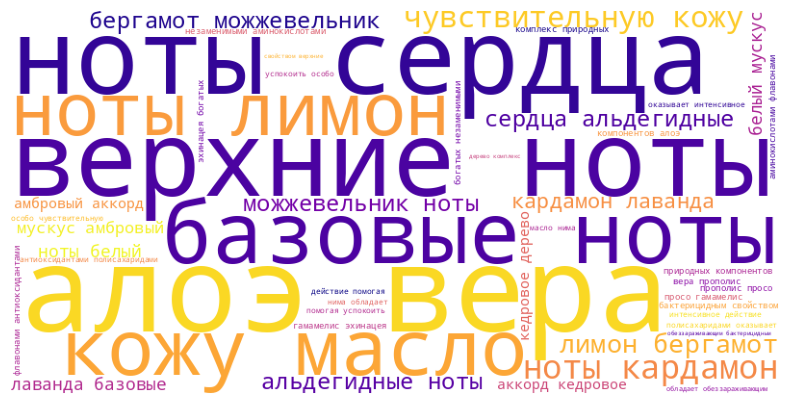

In [194]:
def clean_text(text):
    if pd.isna(text) or text == 'None' or text == 'none' or text == 'nan' or text is None:
        return ""
    if text.strip() == "":
        return ""
    text = text.lower()
    text = re.sub(r"[^а-яa-z ]", " ", text)
    words = text.split()
    text = " ".join([word for word in words if word.lower() not in russian_stopwords])
    return text

df_riv['description_part2'] = df_riv['description_part2'].fillna("").astype(str)
df_riv['description_part2'] = df_riv['description_part2'].apply(clean_text)
filtered_text = " ".join(df_riv['description_part2'][df_riv['description_part2'] != ""])
wordcloud_1 = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1)
plt.axis("off")
plt.show()

In [195]:
df_riv['normalized_rating'] = (df_riv['rating'] - df_riv['rating'].mean()) / df_riv['rating'].std()
country_counts = df_riv['production'].value_counts().reset_index()
country_counts.columns = ['production', 'count']
country_counts = country_counts.sort_values('count', ascending=False)
avg_price_by_country = df_riv.groupby('production')['price'].mean().reset_index()
avg_price_by_country = avg_price_by_country.set_index('production').reindex(country_counts['production']).reset_index()
avg_rating_by_country = df_riv.groupby('production')['normalized_rating'].mean().reset_index()
avg_rating_by_country = avg_rating_by_country.set_index('production').reindex(country_counts['production']).reset_index()

fig = make_subplots(rows=3, cols=1,
                   subplot_titles=('Количество товаров по странам производства',
                                  'Средняя цена по странам производства',
                                  'Средний стандартизированный рейтинг по странам производства'),
                   vertical_spacing=0.2)
fig.add_trace(
    go.Bar(x=country_counts['production'], y=country_counts['count'],
           marker_color='royalblue', name='Количество товаров'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=avg_price_by_country['production'], y=avg_price_by_country['price'],
           marker_color='forestgreen', name='Средняя цена'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=avg_rating_by_country['production'], y=avg_rating_by_country['normalized_rating'],
           marker_color='firebrick', name='Средний стандартизированный рейтинг'),
    row=3, col=1
)

fig.update_layout(height=1200, width=1000, showlegend=False)
fig.update_yaxes(title_text='Количество товаров', row=1, col=1)
fig.update_yaxes(title_text='Средняя цена', row=2, col=1)
fig.update_yaxes(title_text='Средний стандартизированный рейтинг', row=3, col=1)
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_xaxes(tickangle=45, row=3, col=1)
fig.show()


In [196]:
df_riv['normalized_rating'] = (df_riv['rating'] - df_riv['rating'].mean()) / df_riv['rating'].std()
effect_counts = df_riv['result'].value_counts(dropna=True).reset_index()
effect_counts.columns = ['result', 'count']
effect_counts = effect_counts.sort_values('count', ascending=False)
avg_price_by_effect = df_riv.dropna(subset=['result']).groupby('result')['price'].mean().reset_index()
avg_price_by_effect = avg_price_by_effect.set_index('result').reindex(effect_counts['result']).reset_index()
avg_rating_by_effect = df_riv.dropna(subset=['result']).groupby('result')['normalized_rating'].mean().reset_index()
avg_rating_by_effect = avg_rating_by_effect.set_index('result').reindex(effect_counts['result']).reset_index()
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=('Количество товаров по эффекту',
                                  'Средняя цена по эффекту',
                                  'Средний стандартизированный рейтинг по эффекту'),
                   vertical_spacing=0.2)
fig.add_trace(
    go.Bar(x=effect_counts['result'], y=effect_counts['count'],
           marker_color='royalblue', name='Количество товаров'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=avg_price_by_effect['result'], y=avg_price_by_effect['price'],
           marker_color='forestgreen', name='Средняя цена'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=avg_rating_by_effect['result'], y=avg_rating_by_effect['normalized_rating'],
           marker_color='firebrick', name='Средний стандартизированный рейтинг'),
    row=3, col=1
)
fig.update_layout(height=1200, width=1000, showlegend=False)
fig.update_yaxes(title_text='Количество товаров', row=1, col=1)
fig.update_yaxes(title_text='Средняя цена', row=2, col=1)
fig.update_yaxes(title_text='Средний стандартизированный рейтинг', row=3, col=1)
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_xaxes(tickangle=45, row=3, col=1)
fig.show()
